In [ ]:
# AUGMENTATION
import cv2
import numpy as np
import os
import random
from tqdm import tqdm

# Augmentation function
def augment_image(image):
    # Random flip
    if random.random() > 0.5:
        image = cv2.flip(image, 1)
    
    # Random rotation
    angle = random.randint(-25, 25)
    h, w = image.shape[:2]
    M = cv2.getRotationMatrix2D((w / 2, h / 2), angle, 1)
    image = cv2.warpAffine(image, M, (w, h))
    
    # Random brightness adjustment
    factor = random.uniform(0.7, 1.3)
    image = np.clip(image * factor, 0, 255).astype(np.uint8)
    
    return image

# Only this folder needs augmentation
class_folder = r"M:\datset\processedIndian-Medicinal-Leaves-Image-Dataset\Medicinal Leaf dataset final\Amruthaballi"
target_count = 500

# Check and create augmentations
if os.path.isdir(class_folder):
    images = [f for f in os.listdir(class_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    current_count = len(images)

    if current_count >= target_count:
        print(f"No augmentation needed. Already has {current_count} images.")
    else:
        needed = target_count - current_count
        print(f"Augmenting {os.path.basename(class_folder)}: {current_count} → {target_count}")

        i = 0
        pbar = tqdm(total=needed)
        while i < needed:
            img_name = random.choice(images)
            img_path = os.path.join(class_folder, img_name)
            img = cv2.imread(img_path)

            if img is None:
                continue

            aug_img = augment_image(img)
            new_filename = f"aug_{i}_{img_name}"
            new_path = os.path.join(class_folder, new_filename)
            cv2.imwrite(new_path, aug_img)
            i += 1
            pbar.update(1)
        pbar.close()
else:
    print(f"Folder not found: {class_folder}")


In [1]:
#DATA PREPROCESSING
from tensorflow.keras.preprocessing import image_dataset_from_directory

# ✅ Load dataset
dataset = image_dataset_from_directory(
    r'M:\datset\processedIndian-Medicinal-Leaves-Image-Dataset\Medicinal Leaf dataset final',
    shuffle=True,
    batch_size=32,
    image_size=(299, 299),
)

# ✅ Class info
class_names = dataset.class_names
print("Class Names:", class_names)
print("Number of Classes:", len(class_names))

# ✅ Inspect one batch
for images, labels in dataset.take(1):
    print("Batch Size:", images.shape[0])
    print("Image Size:", images.shape[1:])
    print("Image Data Type:", images.dtype)
    print("Label Data Type:", labels.dtype)
    print("Label Shape:", labels.shape)
    print("Labels in Batch:", labels.numpy())

# ✅ True total number of images
total_images = sum(1 for _ in dataset.unbatch())
print("Total Number of Images:", total_images)

# ✅ Split dataset properly
def get_dataset_partitions_tf(ds, train_split=0.75, val_split=0.15, test_split=0.1, shuffle=True, shuffle_size=10000):
    ds = ds.unbatch()  # Work with images instead of batches
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    dataset_size = sum(1 for _ in ds)
    train_size = int(train_split * dataset_size)
    val_size = int(val_split * dataset_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size + val_size)

    # ✅ Rebatch back to 32
    return train_ds.batch(32), val_ds.batch(32), test_ds.batch(32)

train_data, val_data, test_data = get_dataset_partitions_tf(dataset)
print("Train Data:", sum(1 for _ in train_data.unbatch()))
print("Validation Data:", sum(1 for _ in val_data.unbatch()))
print("Test Data:", sum(1 for _ in test_data.unbatch()))



Found 19739 files belonging to 40 classes.
Class Names: ['Aloevera', 'Amla', 'Amruthaballi', 'Arali', 'Bamboo', 'Beans', 'Betel', 'Bhrami', 'Castor', 'Citron lime (herelikai)', 'Coriender', 'Curry', 'Drumstick', 'Fenugreek', 'Gasagase', 'Guava', 'Hibiscus', 'Insulin', 'Jackfruit', 'Jasmine', 'Lantana', 'Lemon', 'Malabar_Nut', 'Malabar_Spinach', 'Mango', 'Mint', 'Neem', 'Onion', 'Palak(Spinach)', 'Papaya', 'Parijatha', 'Pomoegranate', 'Pumpkin', 'Rasna', 'Rose', 'Spinach1', 'Tamarind', 'Tulsi', 'Turmeric', 'ashoka']
Number of Classes: 40
Batch Size: 32
Image Size: (299, 299, 3)
Image Data Type: <dtype: 'float32'>
Label Data Type: <dtype: 'int32'>
Label Shape: (32,)
Labels in Batch: [23  8  9  3 21 23 28 27 37  2 30  1 10  6 33 38 11 15  6 30 24  9 34 19
 20 20 38  2 15  4 11 38]
Total Number of Images: 19739
Train Data: 14804
Validation Data: 2960
Test Data: 1975




Epoch 1/20


463/463 [==============================] - 820s 2s/step - loss: 1.8867 - accuracy: 0.5037 - val_loss: 0.8217 - val_accuracy: 0.8074
Epoch 2/20
463/463 [==============================] - 829s 2s/step - loss: 1.0046 - accuracy: 0.7246 - val_loss: 0.5291 - val_accuracy: 0.8699
Epoch 3/20
463/463 [==============================] - 817s 2s/step - loss: 0.8030 - accuracy: 0.7753 - val_loss: 0.3954 - val_accuracy: 0.9074
Epoch 4/20
463/463 [==============================] - 804s 2s/step - loss: 0.6826 - accuracy: 0.8052 - val_loss: 0.3385 - val_accuracy: 0.9152
Epoch 5/20
463/463 [==============================] - 814s 2s/step - loss: 0.5999 - accuracy: 0.8302 - val_loss: 0.2728 - val_accuracy: 0.9294
Epoch 6/20
463/463 [==============================] - 812s 2s/step - loss: 0.5281 - accuracy: 0.8519 - val_loss: 0.2342 - val_accuracy: 0.9456
Epoch 7/20
463/463 [==============================] - 815s 2s/step - loss: 0.4949 - accuracy: 0.8537 - val_loss: 0.2068 - val_accuracy: 0.

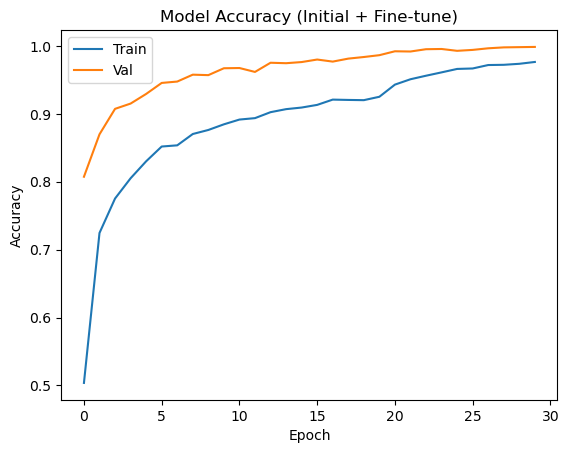

In [2]:
#DATA TRAINING
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import Resizing, Rescaling, Dense, Dropout, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# ✅ Preprocessing Layer
resize_and_rescale = Sequential([
    Resizing(299, 299),
    Rescaling(1./255)
])

# ✅ Load Pretrained Xception Model (No top layer)
base_model = Xception(
    weights='imagenet',
    input_shape=(299, 299, 3),
    include_top=False,
    pooling='avg'
)
base_model.trainable = False  # freeze initially

# ✅ Custom model definition
inputs = Input(shape=(299, 299, 3))
x = resize_and_rescale(inputs)
x = base_model(x, training=False)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(40, activation='softmax')(x)  # 🔄 Updated to 40 classes
model = Model(inputs, outputs)

# ✅ Compile the model
model.compile(
    optimizer=Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# ✅ Early stopping for initial training
early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=3,
    restore_best_weights=True
)

# 🔁 Initial training
history = model.fit(
    train_data,
    validation_data=val_data,
    batch_size=32,
    epochs=20,
    callbacks=[early_stop]
)

# ✅ Evaluate before fine-tuning
model.evaluate(test_data)

# ✅ Fine-tuning setup
base_model.trainable = True
for layer in base_model.layers[:-20]:
    layer.trainable = False

# ✅ Recompile with smaller learning rate
model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# ✅ Early stopping for fine-tuning
early_stop_fine = EarlyStopping(
    monitor='val_accuracy',
    patience=3,
    restore_best_weights=True
)

# 🔁 Fine-tuning
fine_tune_history = model.fit(
    train_data,
    validation_data=val_data,
    batch_size=32,
    epochs=10,
    callbacks=[early_stop_fine]
)

# ✅ Evaluate again
model.evaluate(test_data)

# ✅ Save the model
model.save("Trained_model.keras")

# ✅ Accuracy plot
plt.plot(history.history['accuracy'] + fine_tune_history.history['accuracy'])
plt.plot(history.history['val_accuracy'] + fine_tune_history.history['val_accuracy'])
plt.title('Model Accuracy (Initial + Fine-tune)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()





1/1 [==============================] - 1s 751ms/step
🌿 Final Prediction: This image most likely belongs to **Betel** with a 70.37% confidence.

🔝 Top 5 Predictions:
Betel: 70.37%
Amruthaballi: 51.63%
Jasmine: 51.28%
Parijatha: 50.24%
Malabar_Spinach: 50.21%


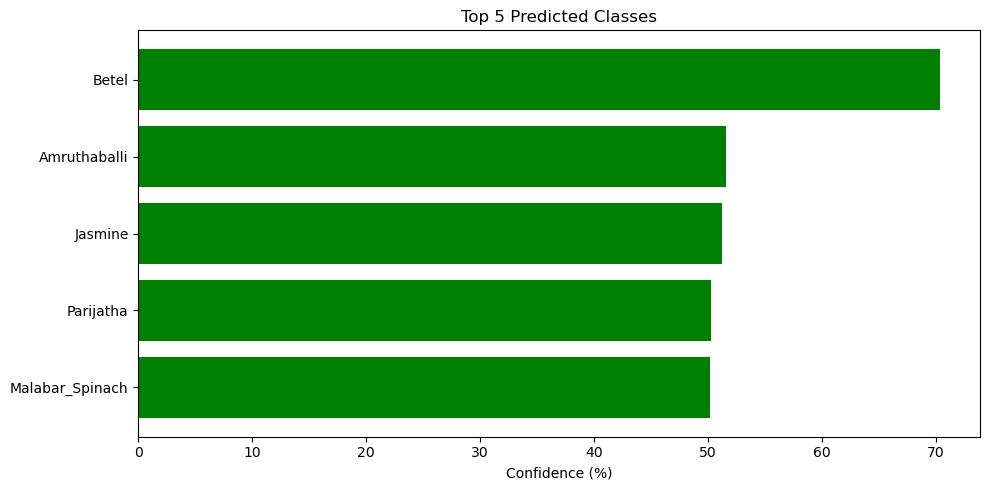

In [1]:
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.models import load_model
from tensorflow import expand_dims
from tensorflow.nn import sigmoid
import matplotlib.pyplot as plt

# Class Names (must be same as training)
class_names = ['Aloevera', 'Amla', 'Amruthaballi', 'Arali', 'Bamboo', 'Beans', 'Betel', 'Bhrami',
               'Castor', 'Citron lime (herelikai)', 'Coriender', 'Curry', 'Drumstick', 'Fenugreek',
               'Gasagase', 'Guava', 'Hibiscus', 'Insulin', 'Jackfruit', 'Jasmine',
               'Lantana', 'Lemon', 'Malabar_Nut', 'Malabar_Spinach', 'Mango', 'Mint', 'Neem',
               'Onion', 'Palak(Spinach)', 'Papaya', 'Parijatha', 'Pomoegranate', 'Pumpkin', 'Rasna', 'Rose', 'Spinach1', 'Tamarind', 'Tulsi', 'Turmeric', 'ashoka']

# Load the trained model
model = load_model('Trained_model.keras')

# Load and preprocess the image
image = load_img("betel.jpg", target_size=(299, 299))
image_array = img_to_array(image)
image_array = expand_dims(image_array, 0)  # Add batch dimension

# Get prediction from the model
pred = sigmoid(model.predict(image_array)[0])
pred_np = pred.numpy()  # Convert to NumPy for processing

# Final prediction
predicted_index = np.argmax(pred_np)
predicted_class = class_names[predicted_index]
confidence = 100 * np.max(pred_np)

print("🌿 Final Prediction: This image most likely belongs to **{}** with a {:.2f}% confidence.".format(
    predicted_class, confidence))

# Get top 5 predictions
top_indices = pred_np.argsort()[-5:][::-1]
top_probs = pred_np[top_indices]
top_labels = [class_names[i] for i in top_indices]

# Show top 5 results
print("\n🔝 Top 5 Predictions:")
for label, prob in zip(top_labels, top_probs):
    print(f"{label}: {prob*100:.2f}%")

# Plot top 5 predictions
plt.figure(figsize=(10, 5))
plt.barh(top_labels[::-1], top_probs[::-1] * 100, color='green')
plt.xlabel('Confidence (%)')
plt.title('Top 5 Predicted Classes')
plt.tight_layout()
plt.show()



Found 8000 files belonging to 40 classes.



📊 Overall Evaluation Metrics:
Accuracy   : 0.5519
Precision  : 0.6340
Recall     : 0.5519
F1-Score   : 0.5477

📋 Classification Report:
                         precision    recall  f1-score   support

               Aloevera       0.74      0.94      0.83       200
                   Amla       0.54      0.77      0.63       200
           Amruthaballi       0.44      0.47      0.46       200
                  Arali       0.98      0.64      0.78       200
                 Bamboo       0.80      0.78      0.79       200
                  Beans       0.91      0.62      0.74       200
                  Betel       0.61      0.20      0.31       200
                 Bhrami       0.82      0.66      0.73       200
                 Castor       0.87      0.54      0.66       200
Citron lime (herelikai)       0.71      0.57      0.63       200
              Coriender       0.98      0.72      0.83       200
                  Curry       0.24   

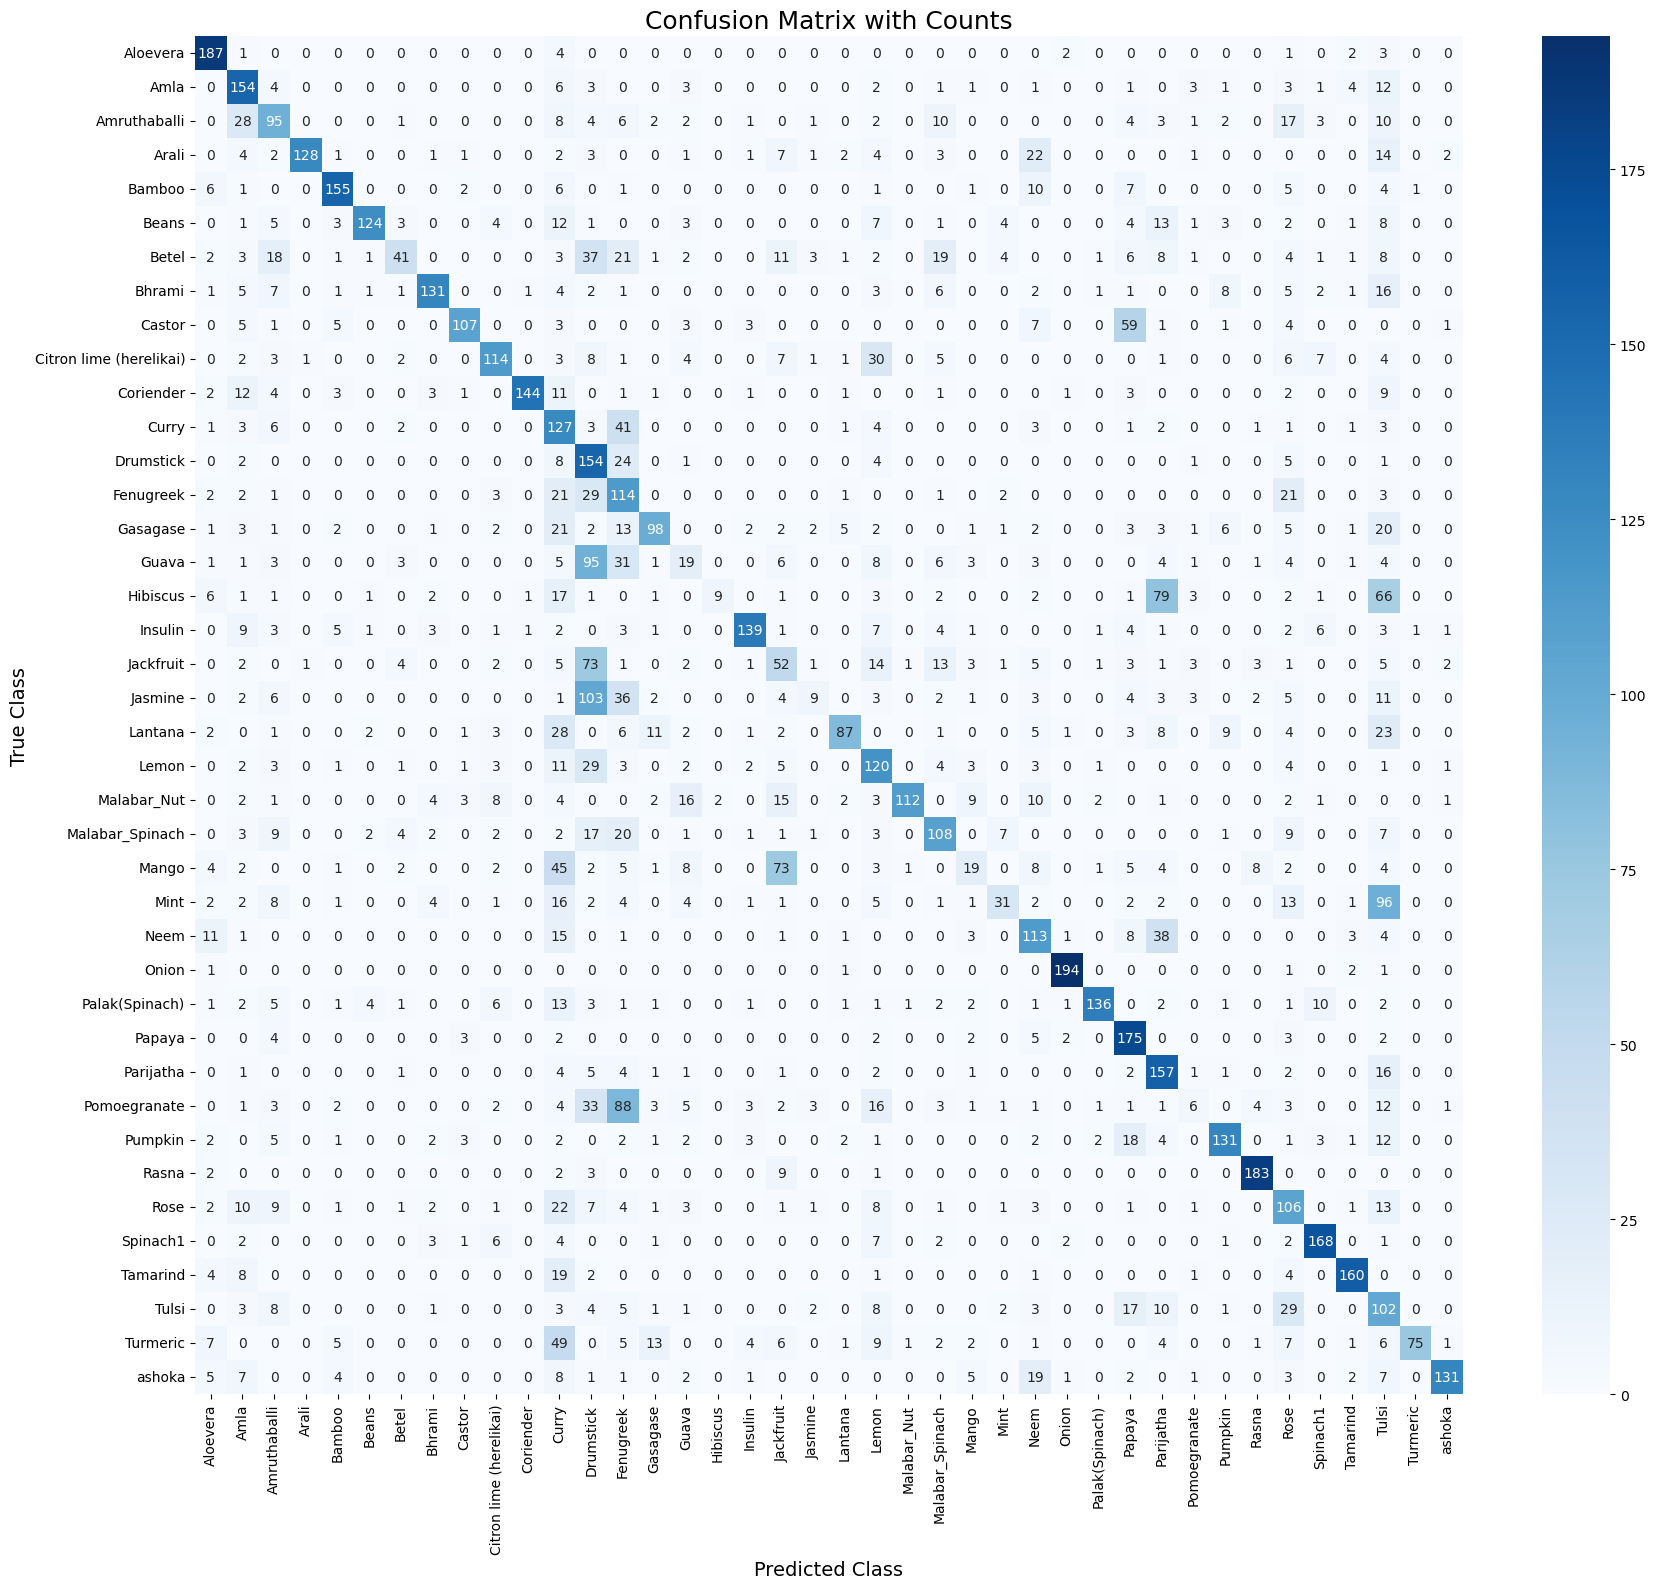

In [1]:
#Modal Evaluation
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# ✅ Define your classes (same order as training dataset)
class_names = [
    "Aloevera", "Amla", "Amruthaballi", "Arali", "Bamboo", "Beans", "Betel", "Bhrami", 
    "Castor", "Citron lime (herelikai)", "Coriender", "Curry", "Drumstick", "Fenugreek", 
    "Gasagase", "Guava", "Hibiscus", "Insulin", "Jackfruit", "Jasmine", "Lantana", "Lemon", 
    "Malabar_Nut", "Malabar_Spinach", "Mango", "Mint", "Neem", "Onion", "Palak(Spinach)", 
    "Papaya", "Parijatha", "Pomoegranate", "Pumpkin", "Rasna", "Rose", "Spinach1", "Tamarind", 
    "Tulsi", "Turmeric", "ashoka"
]

# ✅ Load your test dataset in the SAME way as training
test_data = tf.keras.preprocessing.image_dataset_from_directory(
    r"M:\datset\test",
    image_size=(299, 299),
    batch_size=32,
    shuffle=False  # Do not shuffle
)

# ✅ Load trained model
model = tf.keras.models.load_model("Trained_model.keras")

# ✅ Collect true and predicted labels
y_true = []
y_pred = []

for images, labels in test_data:
    preds = model.predict(images, verbose=0)
    y_true.extend(labels.numpy())                        # true labels
    y_pred.extend(tf.argmax(preds, axis=1).numpy())      # predicted labels

y_true = np.array(y_true)
y_pred = np.array(y_pred)

# ✅ Metrics
acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred, average="macro", zero_division=0)
rec = recall_score(y_true, y_pred, average="macro", zero_division=0)
f1 = f1_score(y_true, y_pred, average="macro", zero_division=0)

print("\n📊 Overall Evaluation Metrics:")
print(f"Accuracy   : {acc:.4f}")
print(f"Precision  : {prec:.4f}")
print(f"Recall     : {rec:.4f}")
print(f"F1-Score   : {f1:.4f}")

# ✅ Classification Report
print("\n📋 Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names, zero_division=0))

# ✅ Confusion Matrix with Numbers
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(18, 16))
sns.heatmap(
    cm,
    annot=True,        # ✅ Show numbers
    fmt="d",           # ✅ Integer format
    cmap="Blues",
    xticklabels=class_names,
    yticklabels=class_names
)
plt.title("Confusion Matrix with Counts", fontsize=18)
plt.xlabel("Predicted Class", fontsize=14)
plt.ylabel("True Class", fontsize=14)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
